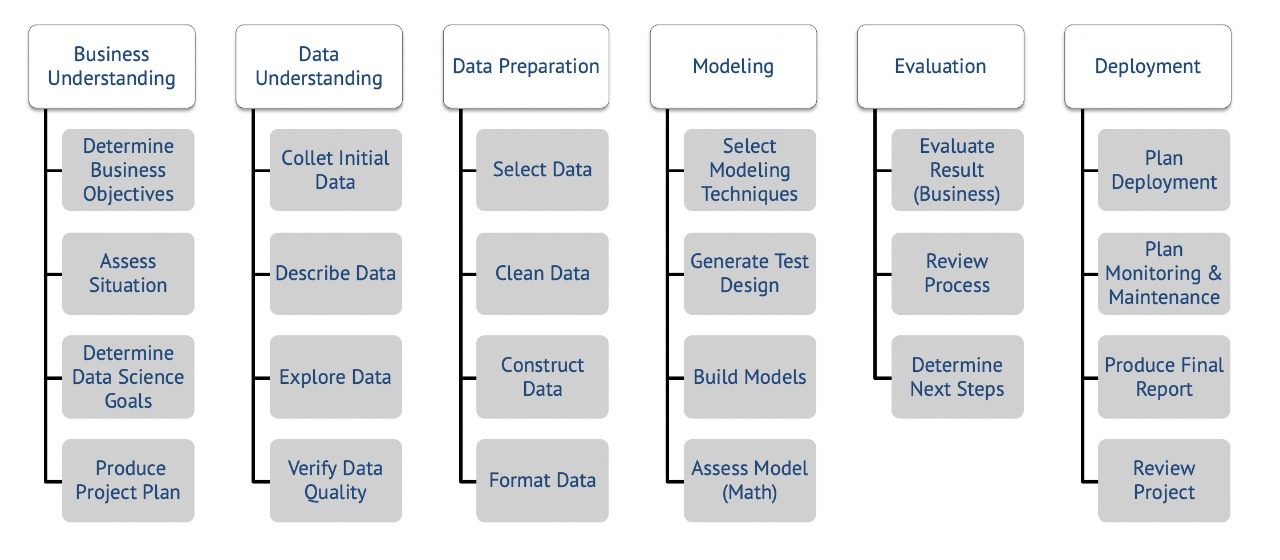

# Business Understanding

I want to monitor the Corona Virus's international expansion and use local data that is specific to me.
The overall information is not really pertinent to me; instead, I would want to have a thorough understanding of the local spread's development.

# Goals

* I want to know how accurate the data is.
* There should be as much automation as is practical. How many clicks are required to run the entire pipeline?

# Contraints:

* Each notebook should be left tidy and prepared for use in its entirety.

In [1]:
import subprocess
import os

import numpy as np

import pandas as pd

from datetime import datetime  # to convert date string to date time object




%matplotlib inline


import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns

import plotly.graph_objects as go
import requests
from bs4 import BeautifulSoup

import json



pd.set_option('display.max_rows', 500)

# Data Understanding

* RKI, webscrape (webscraping) https://www.rki.de/DE/Content/InfAZ/N/Neuartiges_Coronavirus/Fallzahlen.html
* John Hopkins (GITHUB) https://github.com/CSSEGISandData/Covid-19.git
* REST API services to retreive data https://np.geo-corona-np.geo-de.hub.arcgis.com/

# GITHUB csv data

* git clone/pull https://github.com/CSSEGISandData/COVID-19.git

In [2]:
# git_pull = subprocess.Popen( "/usr/bin/git pull" , 
#                      cwd = os.path.dirname( '../data/raw/COVID-19/' ), 
#                      shell = True, 
#                      stdout = subprocess.PIPE, 
#                      stderr = subprocess.PIPE )
# (out, error) = git_pull.communicate()


# print("Error : " + str(error)) 
# print("out : " + str(out))

In [3]:
data_path=r"https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
data_in_raw=pd.read_csv(data_path) 

In [4]:
data_in_raw

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/21/22,6/22/22,6/23/22,6/24/22,6/25/22,6/26/22,6/27/22,6/28/22,6/29/22,6/30/22
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,181808,181912,181987,182033,182072,182149,182228,182324,182403,182528
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,277663,277940,278211,278504,278793,279077,279077,279167,280298,280851
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,265993,266006,266015,266025,266030,266038,266049,266062,266073,266087
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,43449,43774,43774,43774,43774,43774,43774,43774,43774,43774
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,99761,99761,99761,99761,99761,99761,99761,101320,101320,101320
5,NaN,Antarctica,-71.949900,23.347000,0,0,0,0,0,0,...,11,11,11,11,11,11,11,11,11,11
6,NaN,Antigua and Barbuda,17.060800,-61.796400,0,0,0,0,0,0,...,8581,8590,8590,8625,8625,8625,8625,8625,8625,8641
7,NaN,Argentina,-38.416100,-63.616700,0,0,0,0,0,0,...,9341492,9341492,9341492,9341492,9341492,9367172,9367172,9367172,9367172,9367172
8,NaN,Armenia,40.069100,45.038200,0,0,0,0,0,0,...,423104,423104,423104,423104,423104,423104,423243,423243,423243,423243
9,Australian Capital Territory,Australia,-35.473500,149.012400,0,0,0,0,0,0,...,148996,150123,151113,152199,153012,153939,155047,156472,157678,158826


# Webscrapping

In [5]:
page = requests.get("https://www.rki.de/DE/Content/InfAZ/N/Neuartiges_Coronavirus/Fallzahlen.html")

In [6]:
soup = BeautifulSoup(page.content, 'html.parser')

In [7]:
html_table=soup.find('table')

In [8]:
all_rows = html_table.find_all('tr')

In [9]:
final_data_list = []

In [10]:
for pos,rows in enumerate(all_rows):
   
    col_list = [each_col.get_text(strip=True) for each_col in rows.find_all('td')]
    final_data_list.append(col_list)
   

In [11]:
final_data_list

[[],
 [],
 ['Baden-Württem\xadberg', '3.873.564', '13.099', '62.666', '564,4', '16.344'],
 ['Bayern', '5.175.377', '16.690', '83.117', '632,5', '24.409'],
 ['Berlin', '1.108.119', '4.782', '17.319', '472,7', '4.647'],
 ['Branden\xadburg', '826.867', '2.390', '11.415', '451,0', '5.718'],
 ['Bremen', '218.149', '985', '5.551', '816,2', '793'],
 ['Hamburg', '637.202', '3.430', '12.646', '682,7', '2.725'],
 ['Hessen', '2.043.931', '10.812', '50.696', '805,6', '10.376'],
 ['Meck\xadlenburg-Vor\xadpommern',
  '516.692',
  '1.834',
  '10.455',
  '649,1',
  '2.261'],
 ['Nieder\xadsachsen', '2.647.174', '14.619', '78.458', '980,3', '9.688'],
 ['Nord\xadrhein-West\xadfalen',
  '5.771.588',
  '25.121',
  '138.564',
  '773,0',
  '25.763'],
 ['Rhein\xadland-Pfalz', '1.252.785', '5.411', '25.670', '626,3', '5.757'],
 ['Saarland', '341.961', '1.565', '8.537', '867,6', '1.720'],
 ['Sachsen', '1.563.935', '3.394', '16.558', '408,1', '15.601'],
 ['Sachsen-Anhalt', '746.026', '1.902', '9.386', '430,4', '

In [12]:
pd.DataFrame(final_data_list).dropna().rename(columns = {0:'state'})

,state,1,2,3,4,5
2,Baden-Württem­berg,3.873.564,13.099,62.666,"564,4",16.344
3,Bayern,5.175.377,16.690,83.117,"632,5",24.409
4,Berlin,1.108.119,4.782,17.319,"472,7",4.647
5,Branden­burg,826.867,2.390,11.415,"451,0",5.718
6,Bremen,218.149,985,5.551,"816,2",793
7,Hamburg,637.202,3.430,12.646,"682,7",2.725
8,Hessen,2.043.931,10.812,50.696,"805,6",10.376
9,Meck­lenburg-Vor­pommern,516.692,1.834,10.455,"649,1",2.261
10,Nieder­sachsen,2.647.174,14.619,78.458,"980,3",9.688
11,Nord­rhein-West­falen,5.771.588,25.121,138.564,"773,0",25.763


# REST API calls

In [13]:
#data request for Germany
data = requests.get('https://services7.arcgis.com/mOBPykOjAyBO2ZKk/arcgis/rest/services/Coronaf%C3%A4lle_in_den_Bundesl%C3%A4ndern/FeatureServer/0/query?where=1%3D1&outFields=*&outSR=4326&f=json')


In [14]:
json_object = json.loads(data.content)

In [15]:
type(json_object)

dict

In [16]:
json_object.keys()

dict_keys(['objectIdFieldName', 'uniqueIdField', 'globalIdFieldName', 'geometryProperties', 'geometryType', 'spatialReference', 'fields', 'features'])

In [17]:
full_list = []
for pos,each_dict in enumerate (json_object['features'][:]):
    full_list.append(each_dict['attributes'])

In [18]:
pd_full_list = pd.DataFrame(full_list)
pd_full_list.head()

,OBJECTID_1,LAN_ew_AGS,LAN_ew_GEN,LAN_ew_BEZ,LAN_ew_EWZ,OBJECTID,Fallzahl,Aktualisierung,AGS_TXT,GlobalID,faelle_100000_EW,Shape__Area,Shape__Length,Death,cases7_bl_per_100k,cases7_bl,death7_bl,cases7_bl_per_100k_txt,AdmUnitId
0,1,01,Schleswig-Holstein,Land,2910875,15,842807,1656626400000,01,fc5ba936-c95c-432c-8a33-9eb2f30b660f,28953.733843,4.573731e+10,2.881496e+06,2614,1052.226564,30629,3,"1052,2",1
1,2,02,Hamburg,Freie und Hansestadt,1852478,6,637202,1656626400000,02,0f3e860c-5181-4d3f-a421-1d51f50315ea,34397.277593,2.089396e+09,4.188002e+05,2725,682.653181,12646,1,"682,7",2
2,3,03,Niedersachsen,Land,8003421,9,2647174,1656626400000,03,3fd77024-c29b-4843-9be8-682ad48e60c9,33075.531076,1.299836e+11,4.008988e+06,9688,980.305797,78458,8,"980,3",3
3,4,04,Bremen,Freie Hansestadt,680130,5,218149,1656626400000,04,4132268b-54de-4327-ac1e-760e915112f1,32074.603385,1.119157e+09,3.357177e+05,793,816.167497,5551,2,"816,2",4
4,5,05,Nordrhein-Westfalen,Land,17925570,10,5771588,1656626400000,05,561d658f-3ee5-46e3-bc95-3528c6558ab9,32197.514500,8.782936e+10,2.648673e+06,25763,772.996340,138564,16,"773,0",5


# Data Preparation

# Johns Hopkins GITHUB csv data

In [19]:
data_path = r"https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
data_in_raw = pd.read_csv(data_path)

In [20]:
data_in_raw

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/21/22,6/22/22,6/23/22,6/24/22,6/25/22,6/26/22,6/27/22,6/28/22,6/29/22,6/30/22
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,181808,181912,181987,182033,182072,182149,182228,182324,182403,182528
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,277663,277940,278211,278504,278793,279077,279077,279167,280298,280851
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,265993,266006,266015,266025,266030,266038,266049,266062,266073,266087
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,43449,43774,43774,43774,43774,43774,43774,43774,43774,43774
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,99761,99761,99761,99761,99761,99761,99761,101320,101320,101320
5,NaN,Antarctica,-71.949900,23.347000,0,0,0,0,0,0,...,11,11,11,11,11,11,11,11,11,11
6,NaN,Antigua and Barbuda,17.060800,-61.796400,0,0,0,0,0,0,...,8581,8590,8590,8625,8625,8625,8625,8625,8625,8641
7,NaN,Argentina,-38.416100,-63.616700,0,0,0,0,0,0,...,9341492,9341492,9341492,9341492,9341492,9367172,9367172,9367172,9367172,9367172
8,NaN,Armenia,40.069100,45.038200,0,0,0,0,0,0,...,423104,423104,423104,423104,423104,423104,423243,423243,423243,423243
9,Australian Capital Territory,Australia,-35.473500,149.012400,0,0,0,0,0,0,...,148996,150123,151113,152199,153012,153939,155047,156472,157678,158826


In [21]:
data_in_raw.columns[4:]

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '6/21/22', '6/22/22', '6/23/22', '6/24/22', '6/25/22', '6/26/22',
       '6/27/22', '6/28/22', '6/29/22', '6/30/22'],
      dtype='object', length=891)

In [22]:
time_idx = data_in_raw.columns[4:]

In [23]:
df_plot = pd.DataFrame({
    'date':time_idx})
df_plot.head()

,date
0,1/22/20
1,1/23/20
2,1/24/20
3,1/25/20
4,1/26/20


In [24]:
data_in_raw['Country/Region'].head()

0    Afghanistan
1        Albania
2        Algeria
3        Andorra
4         Angola
Name: Country/Region, dtype: object

In [25]:
data_in_raw[data_in_raw['Country/Region'] == 'Germany'].iloc[:,4::].sum(axis = 0)[0:4]

1/22/20    0
1/23/20    0
1/24/20    0
1/25/20    0
dtype: int64

In [26]:
country_list=['Italy',
              'Spain',
              'India',
              'Germany',
              'US'
             ] 

In [27]:
for each in country_list:
    df_plot[each] = np.array(data_in_raw[data_in_raw['Country/Region'] == each].iloc[:,4::].sum(axis = 0))

<AxesSubplot:xlabel='date'>

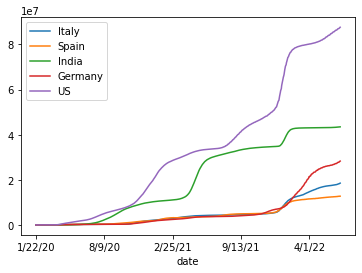

In [28]:
df_plot.set_index('date').plot()

# Data type Date

In [29]:
df_plot.head()

,date,Italy,Spain,India,Germany,US
0,1/22/20,0,0,0,0,1
1,1/23/20,0,0,0,0,1
2,1/24/20,0,0,0,0,2
3,1/25/20,0,0,0,0,2
4,1/26/20,0,0,0,0,5


In [30]:
time_idx = [datetime.strptime( each,"%m/%d/%y") for each in df_plot.date] # convert to datetime
time_str = [each.strftime('%Y-%m-%d') for each in time_idx] # convert back to date IsO norm (str)

In [31]:
df_plot['date'] = time_idx
type(df_plot['date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [32]:
df_plot.head()

,date,Italy,Spain,India,Germany,US
0,2020-01-22,0,0,0,0,1
1,2020-01-23,0,0,0,0,1
2,2020-01-24,0,0,0,0,2
3,2020-01-25,0,0,0,0,2
4,2020-01-26,0,0,0,0,5


In [33]:
df_plot.to_csv(r'C:\Users\pinak savaliya\eds_covid-19_analysis\data\processed\COVID_small_flat_table.csv',sep = ';', index = False)

# Relation data mode - defining a primary key
In the relational model of databases, a primary key is a specific choice of a minimal set of attributes(column) that uniquely specify a tuple(row) in a relation(table)
(source: wiki)

A primary key's main features are:

* It must contain a unique value for each row of data.
* It cannot contain null values.

In [34]:
data_path = r"https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
data_in_raw = pd.read_csv(data_path)
data_in_raw.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/21/22,6/22/22,6/23/22,6/24/22,6/25/22,6/26/22,6/27/22,6/28/22,6/29/22,6/30/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,181808,181912,181987,182033,182072,182149,182228,182324,182403,182528
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,277663,277940,278211,278504,278793,279077,279077,279167,280298,280851
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,265993,266006,266015,266025,266030,266038,266049,266062,266073,266087
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,43449,43774,43774,43774,43774,43774,43774,43774,43774,43774
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,99761,99761,99761,99761,99761,99761,99761,101320,101320,101320


In [35]:
pd_data_base = data_in_raw.rename(columns = {'Country/Region' : 'country',
                                       'Province/State' : 'state'})

In [36]:
pd_data_base = pd_data_base.drop(['Lat','Long'],axis = 1)
pd_data_base.head()

,state,country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,6/21/22,6/22/22,6/23/22,6/24/22,6/25/22,6/26/22,6/27/22,6/28/22,6/29/22,6/30/22
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,181808,181912,181987,182033,182072,182149,182228,182324,182403,182528
1,NaN,Albania,0,0,0,0,0,0,0,0,...,277663,277940,278211,278504,278793,279077,279077,279167,280298,280851
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,265993,266006,266015,266025,266030,266038,266049,266062,266073,266087
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,43449,43774,43774,43774,43774,43774,43774,43774,43774,43774
4,NaN,Angola,0,0,0,0,0,0,0,0,...,99761,99761,99761,99761,99761,99761,99761,101320,101320,101320


In [37]:
pd_relational_model = pd_data_base.set_index(['state','country'])\
                                  .T                             \
                                  .stack(level = [0,1])          \
                                  .reset_index()                 \
                                  .rename(columns = {'level_0' : 'date',
                                                    0 : 'confirmed'},
                                                    )
pd_relational_model.head()

,date,state,country,confirmed
0,1/22/20,NaN,Afghanistan,0.0
1,1/22/20,NaN,Albania,0.0
2,1/22/20,NaN,Algeria,0.0
3,1/22/20,NaN,Andorra,0.0
4,1/22/20,NaN,Angola,0.0


In [38]:
pd_relational_model.dtypes

date          object
state         object
country       object
confirmed    float64
dtype: object

In [39]:
pd_relational_model['data'] = pd_relational_model.date.astype('datetime64[ns]')

In [40]:
pd_relational_model.dtypes

date                 object
state                object
country              object
confirmed           float64
data         datetime64[ns]
dtype: object

In [41]:
df_plot.to_csv(r'C:\Users\pinak savaliya\eds_covid-19_analysis\data\processed\COVID_relational_confirmed.csv' ,sep = ';')